In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("adult.csv",
        names=[
        "Age","Workclass", "fnlwgt", "Education", "Education-Num", "Marital Status",
        "Occupation", "Relationships", "Race", "Gender", "Capital Gain", "Capital loss",
        "Hours per weak", "Country", "Target"])
data.head(10)

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationships,Race,Gender,Capital Gain,Capital loss,Hours per weak,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<function matplotlib.pyplot.show(*args, **kw)>

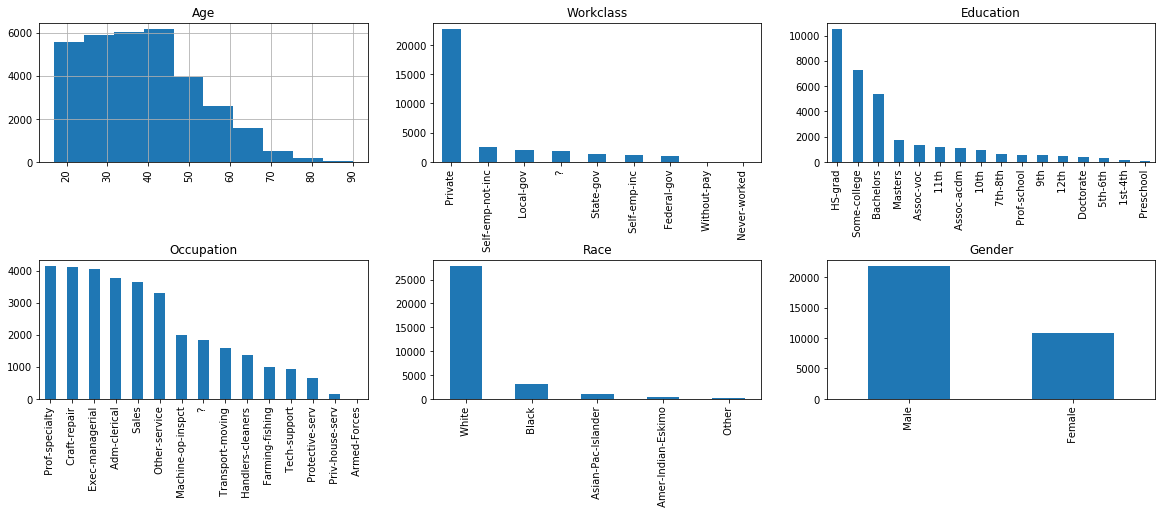

In [3]:
import matplotlib.pyplot as plt
import math
%matplotlib inline

fig = plt.figure(figsize = (20,20))
cols = 3
rows = math.ceil(float(data.shape[1])/cols)
               
for i, column in enumerate(['Age', 'Workclass', 'Education', 'Occupation', 'Race','Gender']):
    ax = fig.add_subplot(rows, cols, i+1)
    ax.set_title(column)
    if data.dtypes[column] == np.object:
        data[column].value_counts().plot(kind = "bar", axes = ax)
    else:
        data[column].hist(axes = ax)
        plt.xticks(rotation = "vertical")

plt.subplots_adjust(hspace = 0.7, wspace = 0.2)
plt.show
                                                  

In [4]:
import sklearn.preprocessing as preprocessing  

le=preprocessing.LabelEncoder()
data['Occupation']=le.fit_transform(data['Occupation'].astype(str))   
data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationships,Race,Gender,Capital Gain,Capital loss,Hours per weak,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,1,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,4,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,6,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,6,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,10,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
data['Target']=le.fit_transform(data['Target'].astype(str))    
data.tail()

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationships,Race,Gender,Capital Gain,Capital loss,Hours per weak,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,13,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,7,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,1,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,1,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,4,Wife,White,Female,15024,0,40,United-States,1


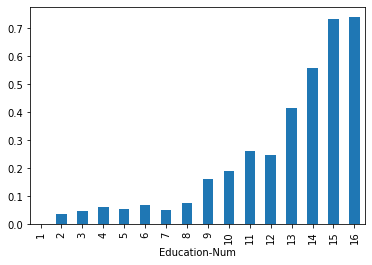

In [6]:
data.groupby('Education-Num').Target.mean().plot(kind='bar') 
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = data[['Education-Num', 'Occupation']]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [8]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train,y_train)

score = classifier.score(X_test,y_test)
print(score)


0.7839705204974666


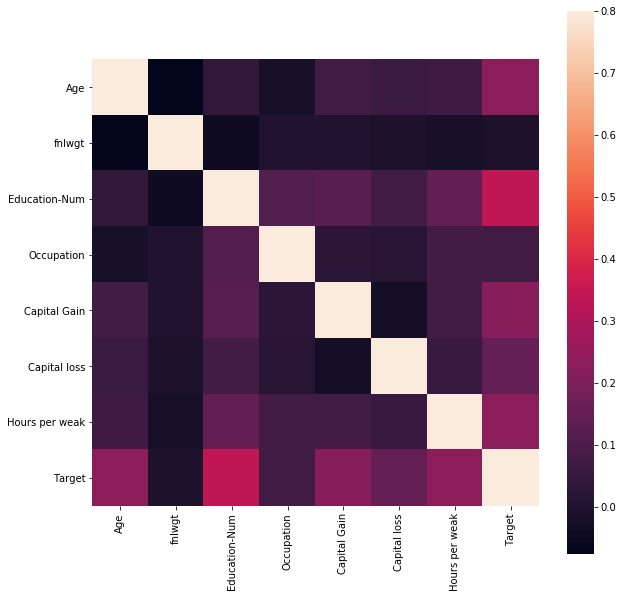

In [9]:
import seaborn as sns

corrmat = data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax = .8,square = True)
plt.show()

In [10]:
data['Race'] = le.fit_transform(data['Race'].astype(str))

data['Gender'] = le.fit_transform(data['Gender'].astype(str))

data['Marital Status'] = le.fit_transform(data['Marital Status'].astype(str))

data['Education'] = le.fit_transform(data['Education'].astype(str))



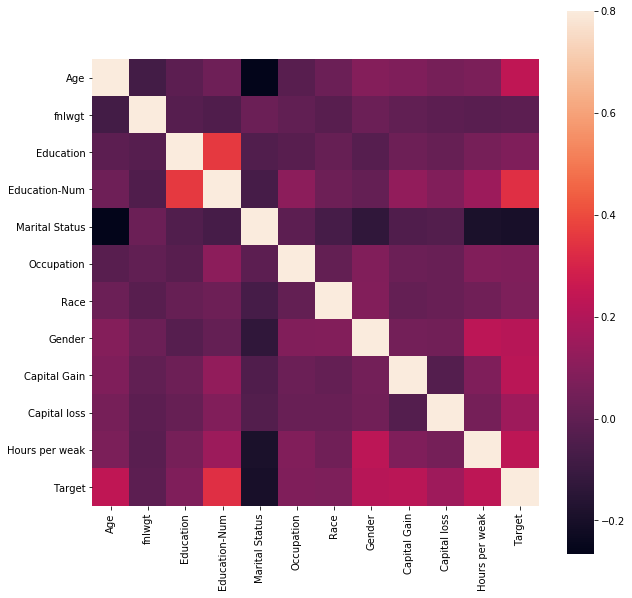

In [11]:
corrmat=data.corr()
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,vmax=.8,square=True)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

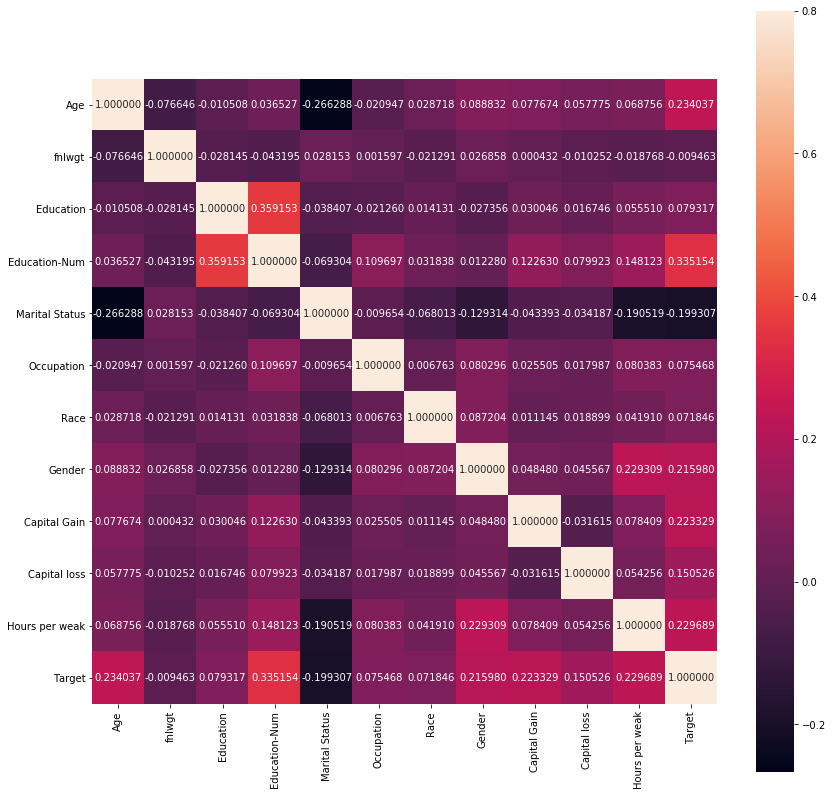

In [12]:
f, ax = plt.subplots(figsize = (14, 14))
sns.heatmap(corrmat, vmax = .8, square = True, annot = True, fmt = '2f')
plt.show

In [18]:
X = data[['Education-Num', 'Occupation', 'Age', 'Gender']]                     
y = data['Target']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)


0.7937970213419315


In [24]:
classifier = SVC(kernel = 'rbf', C = 20.0)
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
print(score)

0.7988638108398587
